### Project 5: Technology and Romantic Relationships

The datasets we are using were compiled by the Pew Research Center titled “American Trends Panel Wave 56” from October 2019.  According to the Pew Research Center, “These findings are based on a survey conducted Oct. 16-28, 2019, among 4,860 U.S. adults. This includes those who took part as members of Pew Research Center’s American Trends Panel (ATP), an online survey panel that is recruited through national, random sampling of residential addresses, as well as respondents from the Ipsos KnowledgePanel who indicated that they identify as lesbian, gay or bisexual (LGB). (https://www.pewsocialtrends.org/2020/08/20/methodology-38/) In this study, there were 61 questions on dating preferences, privacy, harassment, challenges, benefits, and experiences with online dating.

In [1]:
import pandas as pd
#!pip install pyreadstat
df = pd.read_spss('ATP W56.sav')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


pd.options.display.max_columns = 100
pd.options.display.max_rows = 3000

In [4]:
df.head() #verify dataset was downloaded and properly formatted

,QKEY,INTERVIEW_START_W56,INTERVIEW_END_W56,DEVICE_TYPE_W56,SAMPLE_W56,FORM_W56,MARITAL_W56,MARITAL2_W56,RELATEVER_W56,CASUAL_W56,SEEKING_W56,MOTIVNODATE.a_W56,MOTIVNODATE.b_W56,MOTIVNODATE.c_W56,MOTIVNODATE.d_W56,MOTIVNODATE.e_W56,MOTIVNODATE.f_W56,MOTIVNODATE.g_W56,MOTIVNODATE.h_W56,TOTRELDUR_W56,FAMSURV19RELAT_W56,FAMSURV19DATING_W56,ONLINEDATE_W56,ONLINEDATE2_W56,PARTNERMEET_W56,ONMEET_W56,DATE10YR_W56,WHYDATE10YRHARDOE_M1_W56,WHYDATE10YRHARDOE_M2_W56,WHYDATE10YRHARDOE_M3_W56,WHYDATE10YRHARD_TECH_W56,WHYDATE10YREASYOE_M1_W56,WHYDATE10YREASYOE_M2_W56,WHYDATE10YREASYOE_M3_W56,WHYDATE10YREASY_TECH_W56,FIRSTDATE.a_W56,FIRSTDATE.b_W56,FIRSTDATE.c_W56,DATEACCEPT.a_W56,DATEACCEPT.b_W56,DATEACCEPT.c_W56,DATEACCEPT.d_W56,DATEACCEPT.e_W56,ONCHECK_W56,TRACKPARTNER_W56,BREAKUP_W56,BREAKUPACCEPTF1.a_W56,BREAKUPACCEPTF1.b_W56,BREAKUPACCEPTF1.c_W56,BREAKUPACCEPTF1.d_W56,...,PARTNERSCREEN.b_W56,PARTNERSCREEN.c_W56,PARTNERPASS.a_W56,PARTNERPASS.b_W56,PARTNERPASS.c_W56,PARTNERTRACK_W56,DATEVOCAB.a_W56,DATEVOCAB.b_W56,DATEVOCAB.c_W56,DATEVOCAB.d_W56,DATEVOCAB.e_W56,DATEGHOST_W56,HARASSEXP1.a_W56,HARASSEXP1.b_W56,HARASSEXP1.c_W56,HARASSEXP2.a_W56,HARASSEXP2.b_W56,HARASSEXP2.c_W56,ONHARASS.a_W56,ONHARASS.b_W56,ONHARASS.c_W56,ONHARASS.d_W56,PARTNERSEX_W56,ORIENTATIONMOD_W56,F_METRO,F_CREGION,F_USR_SELFID,F_AGECAT,F_SEX,F_EDUCCAT,F_EDUCCAT2,F_RACETHN,F_NATIVITY,F_CITIZEN,F_MARITAL,F_RELIG,F_BORN,F_ATTEND,F_PARTY_FINAL,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_INCOME,F_INCOME_RECODE,F_REG,REG_KP,F_IDEO,F_ACSWEB,F_VOLSUM,WEIGHT_W56_ATPONLY,WEIGHT_W56
0,25.0,1.379064e+10,1.379064e+10,Mobile,KP,Form 2,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 years or more,Very well,NaN,"No, have not done this",NaN,Through work,NaN,About the same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes acceptable,Sometimes acceptable,Rarely acceptable,Always acceptable,Sometimes acceptable,Sometimes acceptable,Sometimes acceptable,Rarely acceptable,"No, have not done this",Never acceptable,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,"No, have not done this","No, have not done this","No, have not done this","No, have not done this","No, have not heard of this","No, have not heard of this","No, have not heard of this","Yes, have heard of this","Yes, have heard of this","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me",NaN,NaN,NaN,NaN,Female,Gay or lesbian,Metropolitan,South,Urban,65+,Male,College graduate+,Postgraduate,White non-Hispanic,U.S.,Yes,Married,NaN,NaN,NaN,Democrat,NaN,Dem/Lean Dem,"$150,000 or more","$75,000+",NaN,Yes- registered to vote,Liberal,Accesses Internet by paying a cell phone compa...,Yes,NaN,0.038493
1,26.0,1.379064e+10,1.379064e+10,Mobile,KP,Form 2,Never been married,"No, not in a committed romantic relationship","No, have never been in a committed romantic re...","No, not casually dating anyone",Not currently looking for a relationship or dates,Major reason,Major reason,Not a reason,Not a reason,Not a reason,Major reason,Minor reason,Not a reason,NaN,NaN,NaN,"No, have not done this",NaN,NaN,NaN,About the same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes acceptable,Sometimes acceptable,Rarely acceptable,Always acceptable,Sometimes acceptable,Sometimes acceptable,Always acceptable,Rarely acceptable,"No, have not done this",Sometimes acceptable,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, have heard of this","No, have not heard of this","No, have not heard of this","Yes, have heard of this","Yes, have heard of this","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me",NaN,NaN,NaN,NaN,NaN,Gay or lesbian,Non-metropolitan,South,Suburban,30-49,Male,College graduate+,College graduate/s

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Columns: 183 entries, QKEY to WEIGHT_W56
dtypes: category(178), float64(5)
memory usage: 1.0 MB


In [8]:
df.isnull().sum()

QKEY                           0
INTERVIEW_START_W56            0
INTERVIEW_END_W56              0
DEVICE_TYPE_W56                0
SAMPLE_W56                     0
FORM_W56                       0
MARITAL_W56                    0
MARITAL2_W56                2518
RELATEVER_W56               3743
CASUAL_W56                  2942
SEEKING_W56                 2942
MOTIVNODATE.a_W56           4073
MOTIVNODATE.b_W56           4073
MOTIVNODATE.c_W56           4073
MOTIVNODATE.d_W56           4073
MOTIVNODATE.e_W56           4073
MOTIVNODATE.f_W56           4073
MOTIVNODATE.g_W56           4073
MOTIVNODATE.h_W56           4073
TOTRELDUR_W56               1928
FAMSURV19RELAT_W56          1928
FAMSURV19DATING_W56         3720
ONLINEDATE_W56               119
ONLINEDATE2_W56             2766
PARTNERMEET_W56             1928
ONMEET_W56                  4344
DATE10YR_W56                   0
WHYDATE10YRHARDOE_M1_W56    2550
WHYDATE10YRHARDOE_M2_W56    4593
WHYDATE10YRHARDOE_M3_W56    4838
WHYDATE10Y

There are a lot of nulls but the design of the survey is such that not every column and row will have an answer

What does the distribution of participants in each relationship category.

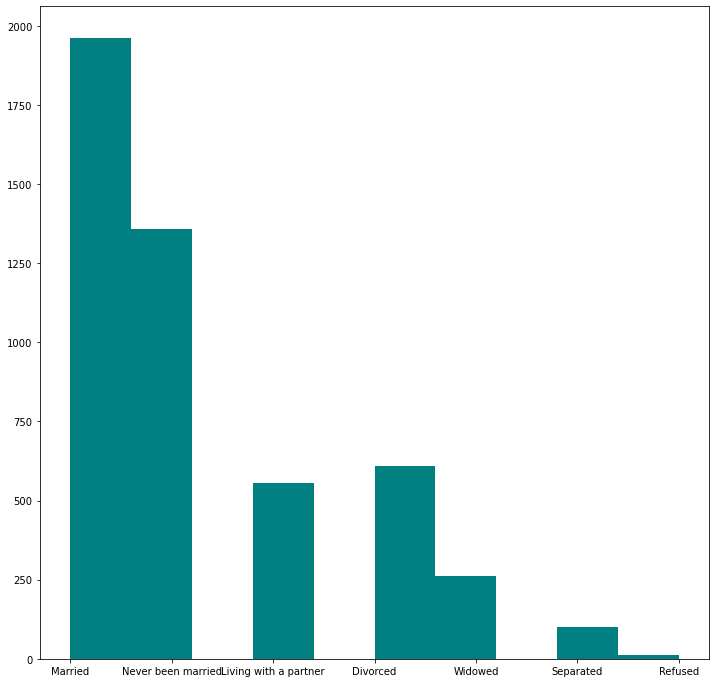

In [9]:
plt.figure(figsize = (12, 12))
plt.hist(df['MARITAL_W56'], color = 'teal');

For this notebook, we will study the effects of technology based on relationship status in committed relationships.  All demographic columns are dropped.

In [10]:
df_drop = ['QKEY', 'INTERVIEW_START_W56', 'INTERVIEW_END_W56', 'DEVICE_TYPE_W56', 'SAMPLE_W56', 'FORM_W56', 'PARTNERSEX_W56', 
           'ORIENTATIONMOD_W56', 'F_METRO', 'F_CREGION', 'F_USR_SELFID', 'F_AGECAT', 'F_SEX', 'F_EDUCCAT', 'F_EDUCCAT2', 
           'F_RACETHN', 'F_NATIVITY', 'F_CITIZEN', 'F_MARITAL', 'F_RELIG', 'F_BORN', 'F_ATTEND', 'F_PARTY_FINAL', 'F_PARTYLN_FINAL',
           'F_PARTYSUM_FINAL',	'F_INCOME', 'F_INCOME_RECODE', 'F_REG', 'REG_KP', 'F_IDEO', 'F_ACSWEB', 'F_VOLSUM',
           'WEIGHT_W56_ATPONLY', 'WEIGHT_W56']

In [11]:
df2 = df.drop(columns = df_drop)
df2.head()

,MARITAL_W56,MARITAL2_W56,RELATEVER_W56,CASUAL_W56,SEEKING_W56,MOTIVNODATE.a_W56,MOTIVNODATE.b_W56,MOTIVNODATE.c_W56,MOTIVNODATE.d_W56,MOTIVNODATE.e_W56,MOTIVNODATE.f_W56,MOTIVNODATE.g_W56,MOTIVNODATE.h_W56,TOTRELDUR_W56,FAMSURV19RELAT_W56,FAMSURV19DATING_W56,ONLINEDATE_W56,ONLINEDATE2_W56,PARTNERMEET_W56,ONMEET_W56,DATE10YR_W56,WHYDATE10YRHARDOE_M1_W56,WHYDATE10YRHARDOE_M2_W56,WHYDATE10YRHARDOE_M3_W56,WHYDATE10YRHARD_TECH_W56,WHYDATE10YREASYOE_M1_W56,WHYDATE10YREASYOE_M2_W56,WHYDATE10YREASYOE_M3_W56,WHYDATE10YREASY_TECH_W56,FIRSTDATE.a_W56,FIRSTDATE.b_W56,FIRSTDATE.c_W56,DATEACCEPT.a_W56,DATEACCEPT.b_W56,DATEACCEPT.c_W56,DATEACCEPT.d_W56,DATEACCEPT.e_W56,ONCHECK_W56,TRACKPARTNER_W56,BREAKUP_W56,BREAKUPACCEPTF1.a_W56,BREAKUPACCEPTF1.b_W56,BREAKUPACCEPTF1.c_W56,BREAKUPACCEPTF1.d_W56,BREAKUPACCEPTF1.e_W56,BREAKUPACCEPTF2.a_W56,BREAKUPACCEPTF2.b_W56,BREAKUPACCEPTF2.c_W56,BREAKUPACCEPTF2.d_W56,BREAKUPACCEPTF2.e_W56,...,ONPROFILES.d_W56,ONPROFILES.e_W56,ONPROFILES.f_W56,ONPROFILES.g_W56,ONPROFILES.h_W56,ONPROFILES.i_W56,ONFIND.a_W56,ONFIND.b_W56,ONFIND.c_W56,ONFIND.d_W56,ONMSGF1_W56,ONMSGF2_W56,ONALGORITHM_W56,ONDATA_W56,SNSUSE_W56,SNSPOST_W56,SNSSEE1_W56,SNSSEE2_W56,SNSCHECK.a_W56,SNSCHECK.b_W56,PARTNERDEVICE.a_W56,PARTNERDEVICE.b_W56,PARTNERDEVICE.c_W56,SNSPARTNER.a_W56,SNSPARTNER.b_W56,SNSFEEL_W56,PARTNERDISTRACT_W56,PARTNERSCREEN.a_W56,PARTNERSCREEN.b_W56,PARTNERSCREEN.c_W56,PARTNERPASS.a_W56,PARTNERPASS.b_W56,PARTNERPASS.c_W56,PARTNERTRACK_W56,DATEVOCAB.a_W56,DATEVOCAB.b_W56,DATEVOCAB.c_W56,DATEVOCAB.d_W56,DATEVOCAB.e_W56,DATEGHOST_W56,HARASSEXP1.a_W56,HARASSEXP1.b_W56,HARASSEXP1.c_W56,HARASSEXP2.a_W56,HARASSEXP2.b_W56,HARASSEXP2.c_W56,ONHARASS.a_W56,ONHARASS.b_W56,ONHARASS.c_W56,ONHARASS.d_W56
0,Married,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20 years or more,Very well,NaN,"No, have not done this",NaN,Through work,NaN,About the same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes acceptable,Sometimes acceptable,Rarely acceptable,Always acceptable,Sometimes acceptable,Sometimes acceptable,Sometimes acceptable,Rarely acceptable,"No, have not done this",Never acceptable,NaN,NaN,NaN,NaN,NaN,NaN,Always acceptable,Rarely acceptable,Rarely acceptable,Never acceptable,Rarely acceptable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, use social media sites",Sometimes,Doesn’t make much difference,NaN,"No, have not done this","No, have not done this",Yes,Yes,Yes,Somewhat important,Not at all important,Refused,Sometimes,Sometimes,Sometimes,Sometimes,"No, have not done this","No, have not done this","No, have not done this","No, have not done this","No, have not heard of this","No, have not heard of this","No, have not heard of this","Yes, have heard of this","Yes, have heard of this","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me","No, this has not happened to me",NaN,NaN,NaN,NaN
1,Never been married,"No, not in a committed romantic relationship","No, have never been in a committed romantic re...","No, not casually dating anyone",Not currently looking for a relationship or dates,Major reason,Major reason,Not a reason,Not a reason,Not a reason,Major reason,Minor reason,Not a reason,NaN,NaN,NaN,"No, have not done this",NaN,NaN,NaN,About the same,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Sometimes acceptable,Sometimes acceptable,Rarely acceptable,Always acceptable,Sometimes acceptable,Sometimes acceptable,Always acceptable,Rarely acceptable,"No, have not done this",Sometimes acceptable,NaN,NaN,NaN,NaN,NaN,NaN,Always acceptable,Rarely acceptable,Rarely acceptable,Never acceptable,Never acceptable,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"No, do not use social media sites",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Yes, have heard of this","No, have not heard of this","No, have not heard of this","Yes, have heard of this","Yes,

<ipython-input-12-10ef66141b06>:4: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize = (12, 12))
C:\Users\mason\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


<Figure size 864x864 with 0 Axes>

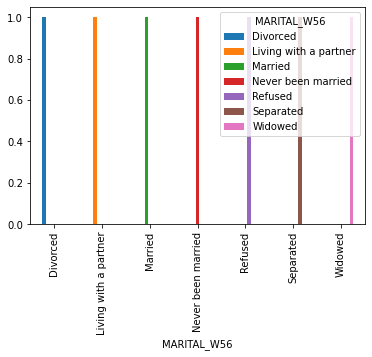

<Figure size 864x864 with 0 Axes>

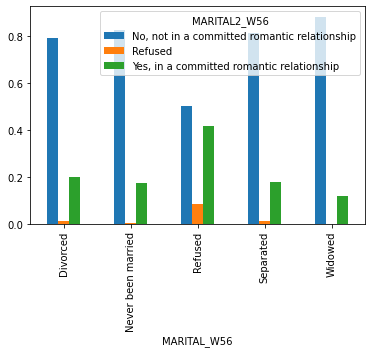

<Figure size 864x864 with 0 Axes>

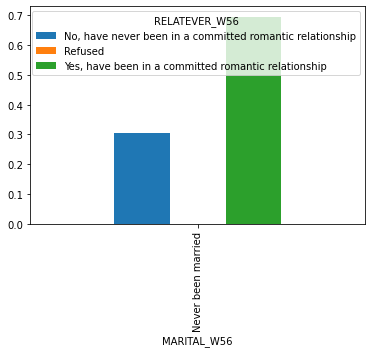

<Figure size 864x864 with 0 Axes>

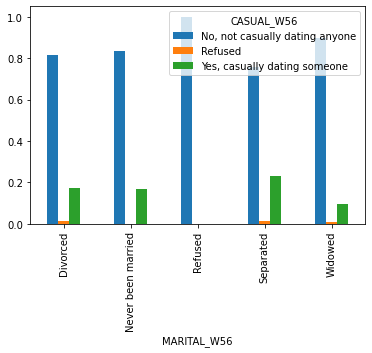

<Figure size 864x864 with 0 Axes>

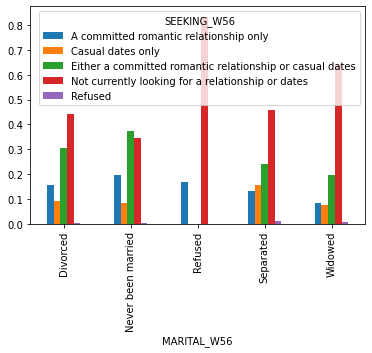

<Figure size 864x864 with 0 Axes>

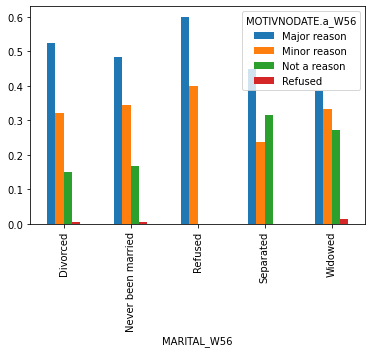

<Figure size 864x864 with 0 Axes>

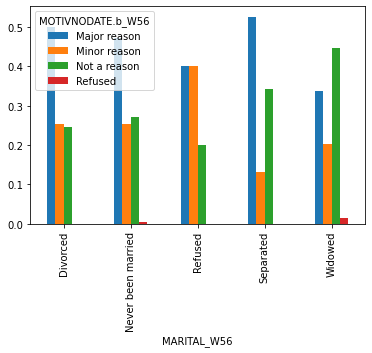

<Figure size 864x864 with 0 Axes>

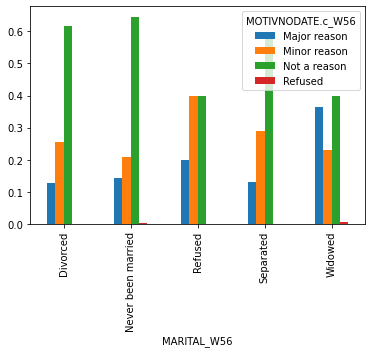

<Figure size 864x864 with 0 Axes>

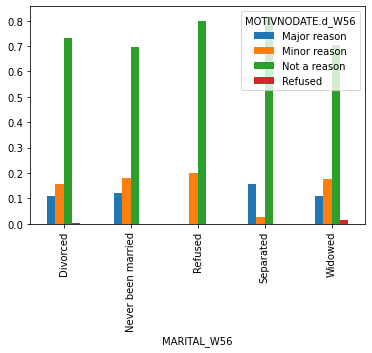

<Figure size 864x864 with 0 Axes>

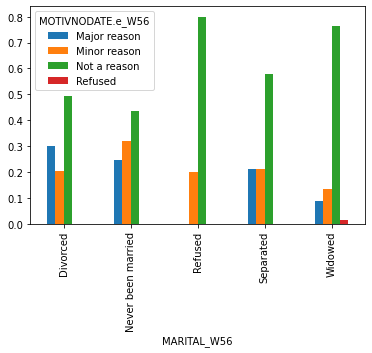

<Figure size 864x864 with 0 Axes>

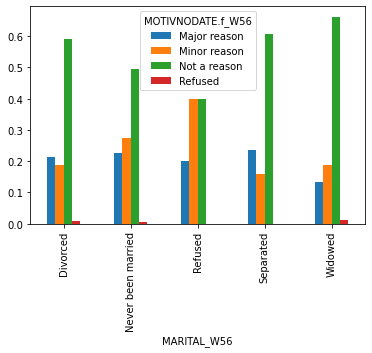

<Figure size 864x864 with 0 Axes>

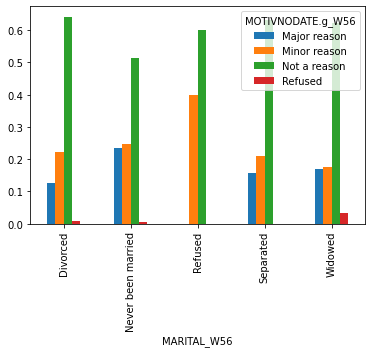

<Figure size 864x864 with 0 Axes>

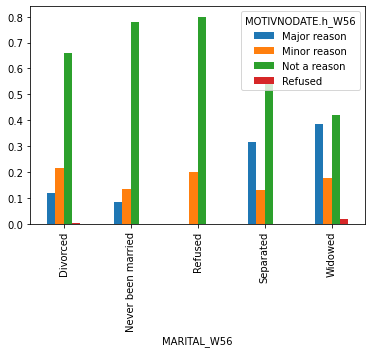

<Figure size 864x864 with 0 Axes>

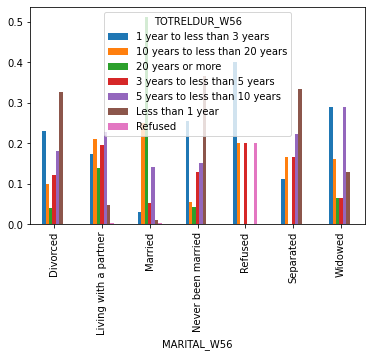

<Figure size 864x864 with 0 Axes>

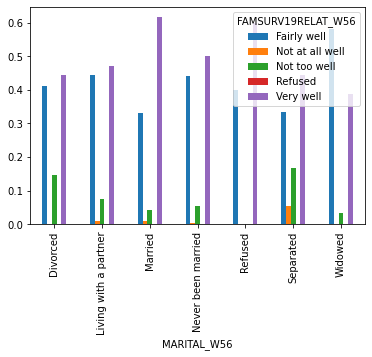

<Figure size 864x864 with 0 Axes>

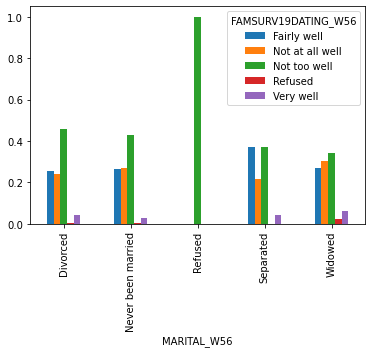

<Figure size 864x864 with 0 Axes>

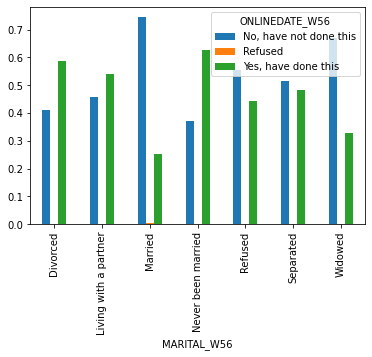

<Figure size 864x864 with 0 Axes>

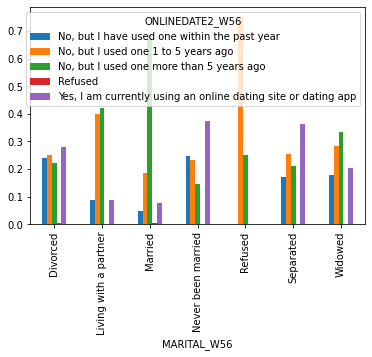

<Figure size 864x864 with 0 Axes>

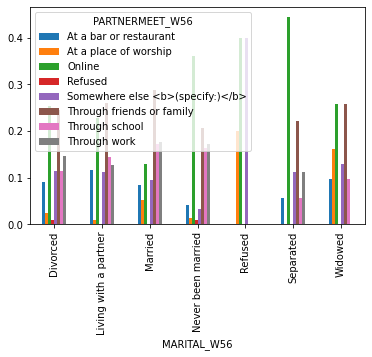

<Figure size 864x864 with 0 Axes>

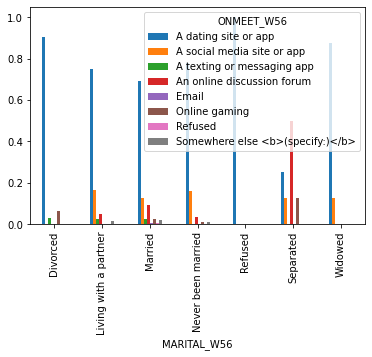

<Figure size 864x864 with 0 Axes>

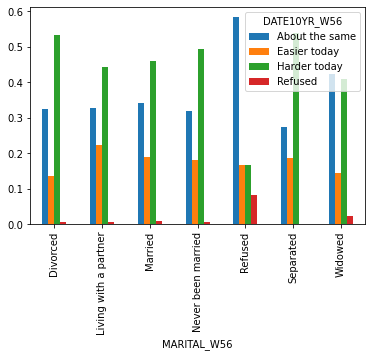

<Figure size 864x864 with 0 Axes>

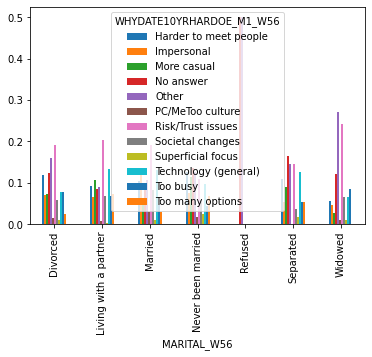

<Figure size 864x864 with 0 Axes>

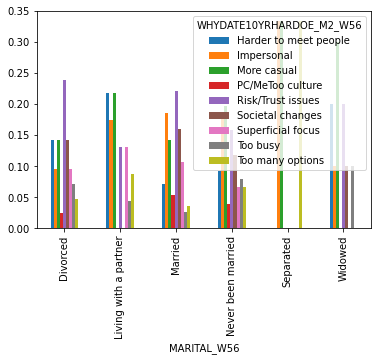

<Figure size 864x864 with 0 Axes>

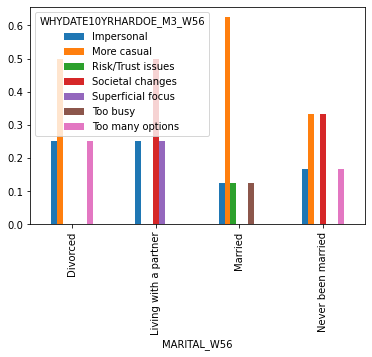

<Figure size 864x864 with 0 Axes>

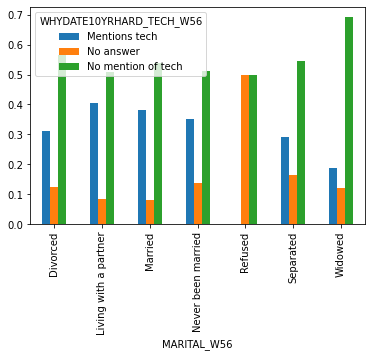

<Figure size 864x864 with 0 Axes>

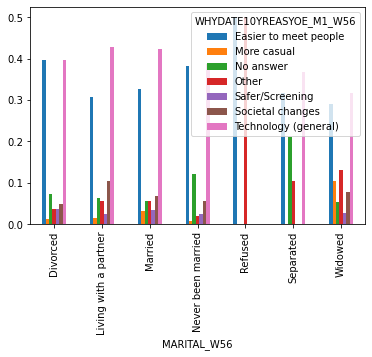

<Figure size 864x864 with 0 Axes>

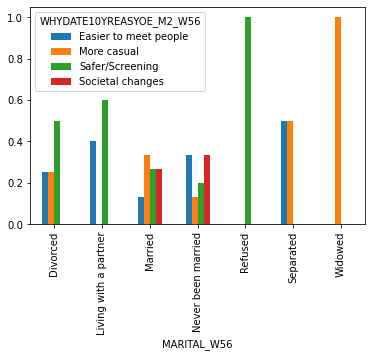

<Figure size 864x864 with 0 Axes>

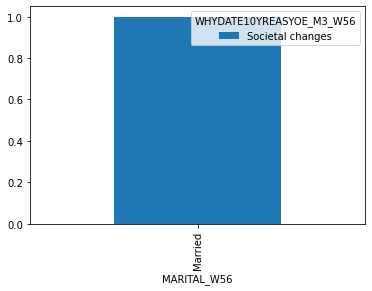

<Figure size 864x864 with 0 Axes>

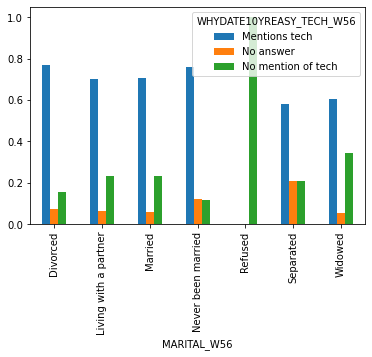

<Figure size 864x864 with 0 Axes>

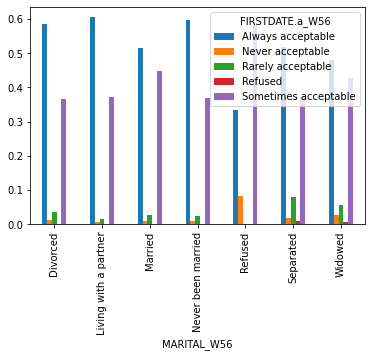

<Figure size 864x864 with 0 Axes>

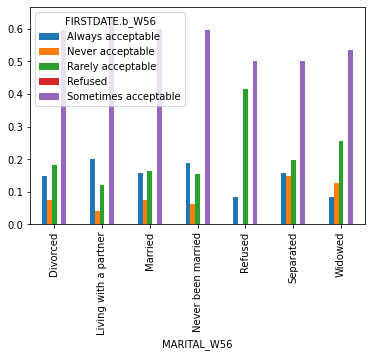

<Figure size 864x864 with 0 Axes>

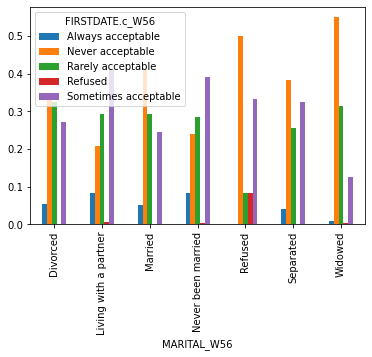

<Figure size 864x864 with 0 Axes>

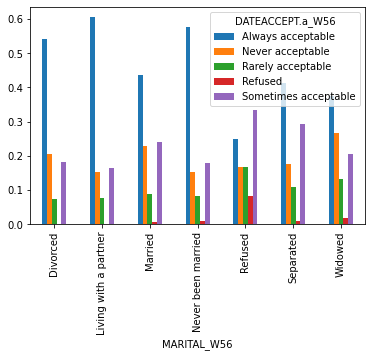

<Figure size 864x864 with 0 Axes>

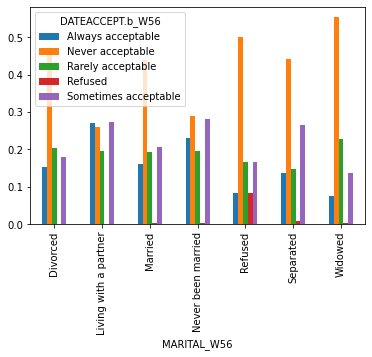

<Figure size 864x864 with 0 Axes>

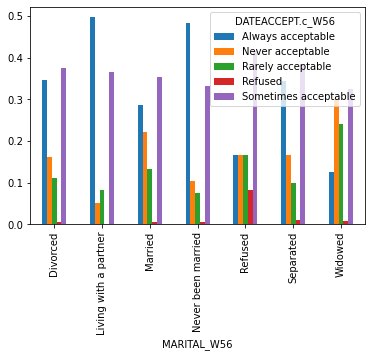

<Figure size 864x864 with 0 Axes>

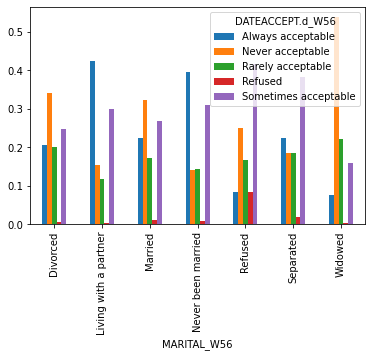

<Figure size 864x864 with 0 Axes>

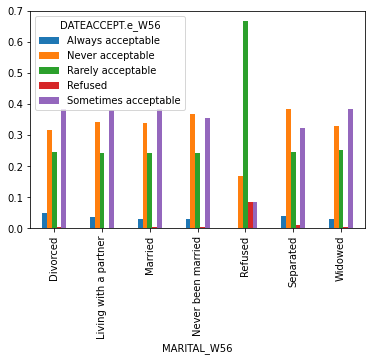

<Figure size 864x864 with 0 Axes>

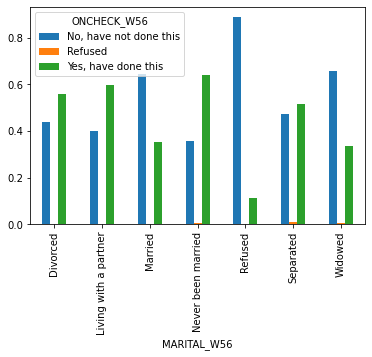

<Figure size 864x864 with 0 Axes>

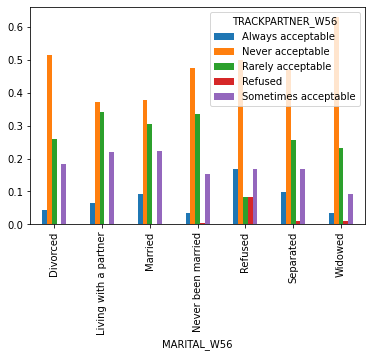

<Figure size 864x864 with 0 Axes>

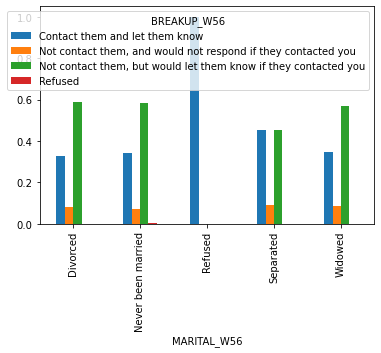

<Figure size 864x864 with 0 Axes>

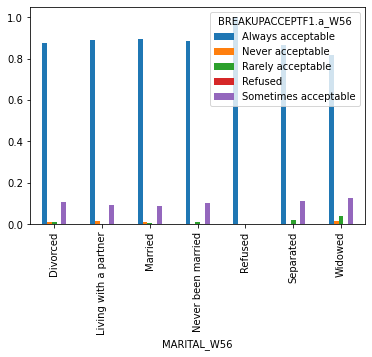

<Figure size 864x864 with 0 Axes>

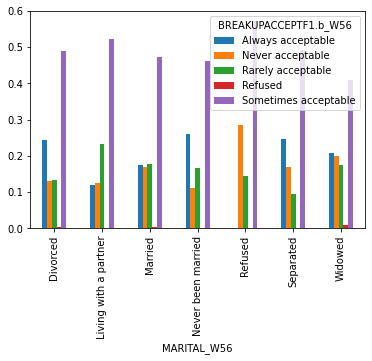

<Figure size 864x864 with 0 Axes>

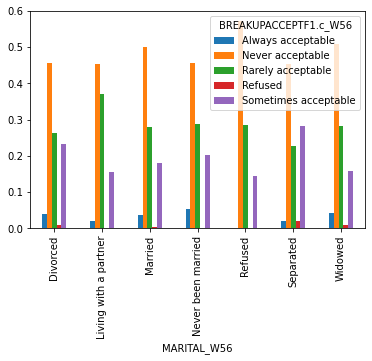

<Figure size 864x864 with 0 Axes>

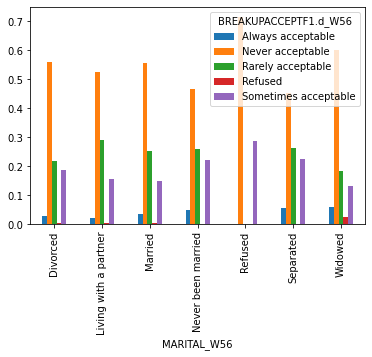

<Figure size 864x864 with 0 Axes>

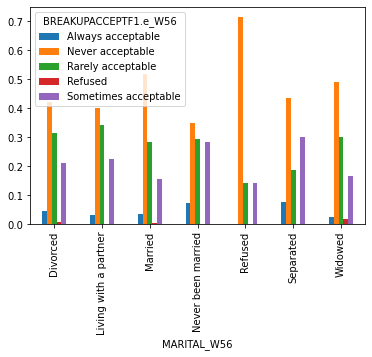

<Figure size 864x864 with 0 Axes>

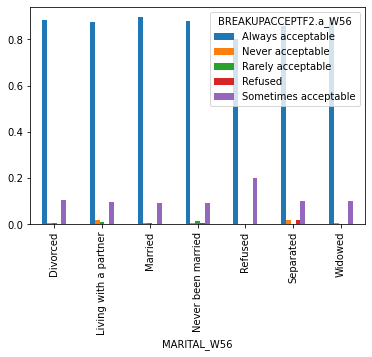

<Figure size 864x864 with 0 Axes>

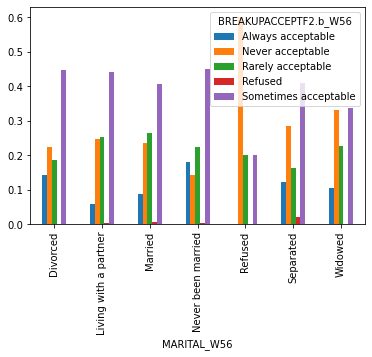

<Figure size 864x864 with 0 Axes>

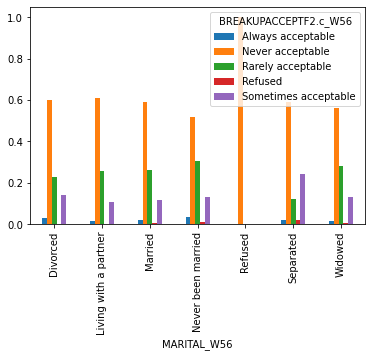

<Figure size 864x864 with 0 Axes>

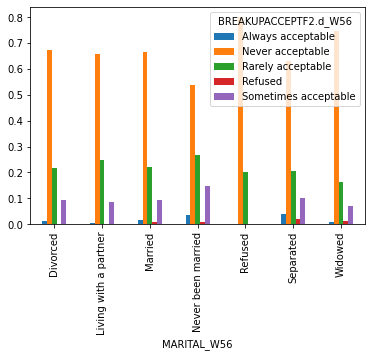

<Figure size 864x864 with 0 Axes>

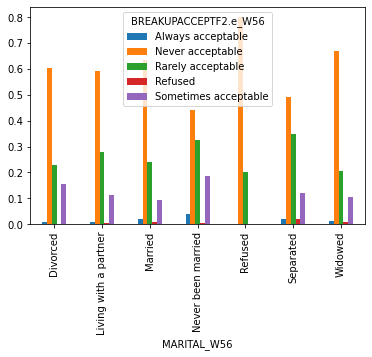

<Figure size 864x864 with 0 Axes>

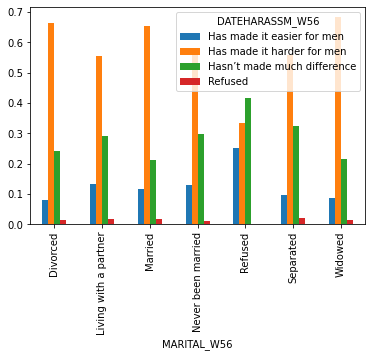

<Figure size 864x864 with 0 Axes>

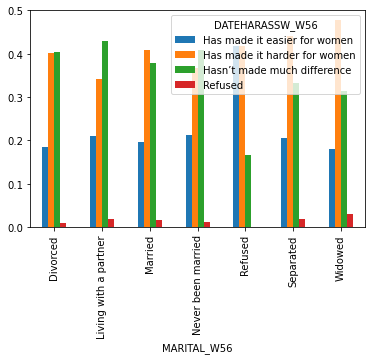

<Figure size 864x864 with 0 Axes>

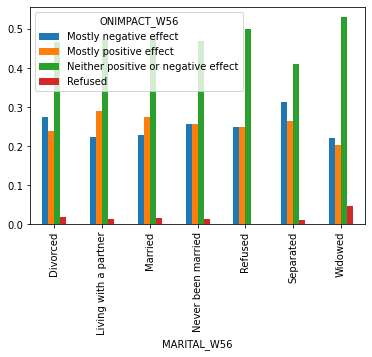

<Figure size 864x864 with 0 Axes>

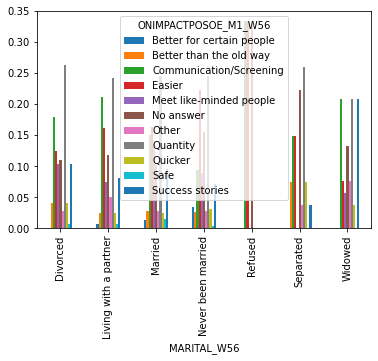

<Figure size 864x864 with 0 Axes>

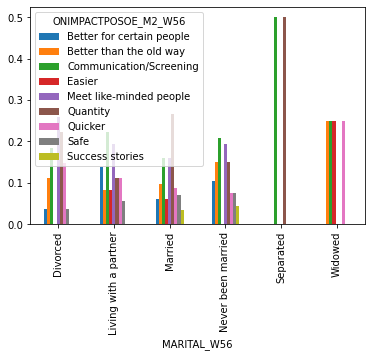

<Figure size 864x864 with 0 Axes>

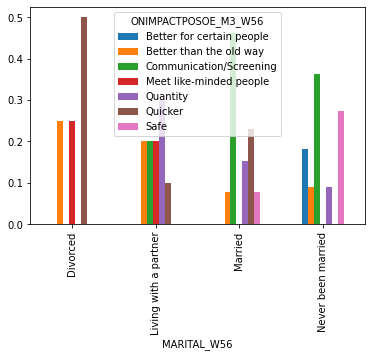

<Figure size 864x864 with 0 Axes>

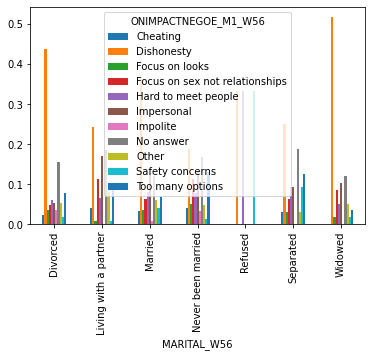

<Figure size 864x864 with 0 Axes>

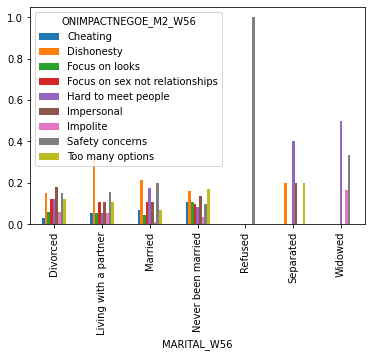

<Figure size 864x864 with 0 Axes>

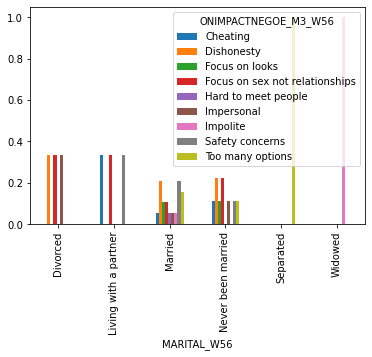

<Figure size 864x864 with 0 Axes>

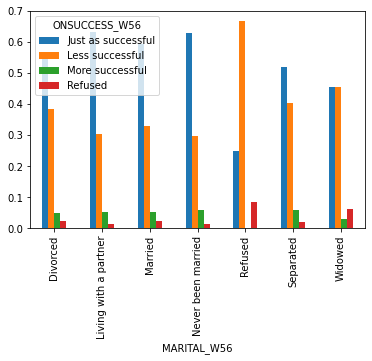

<Figure size 864x864 with 0 Axes>

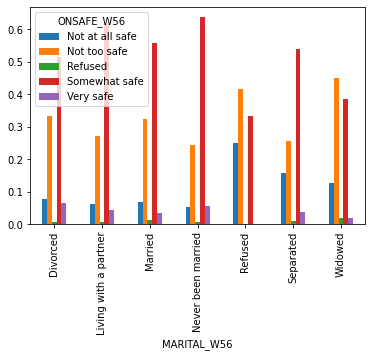

<Figure size 864x864 with 0 Axes>

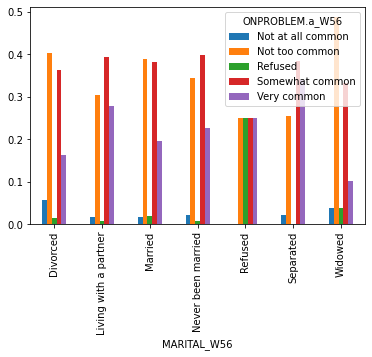

<Figure size 864x864 with 0 Axes>

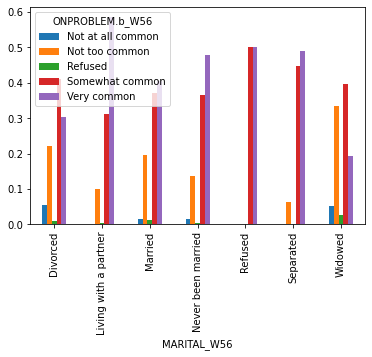

<Figure size 864x864 with 0 Axes>

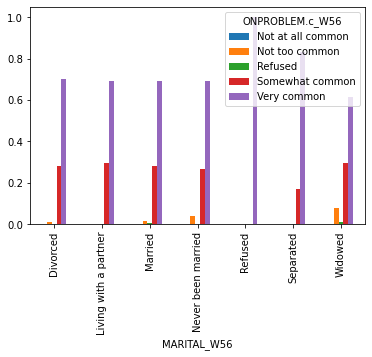

<Figure size 864x864 with 0 Axes>

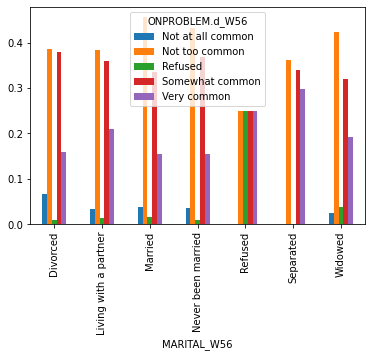

<Figure size 864x864 with 0 Axes>

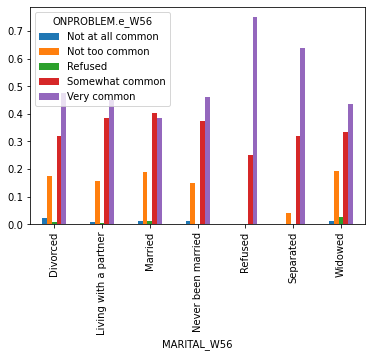

<Figure size 864x864 with 0 Axes>

C:\Users\mason\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\mason\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


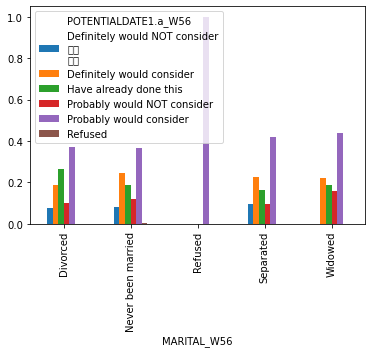

<Figure size 864x864 with 0 Axes>

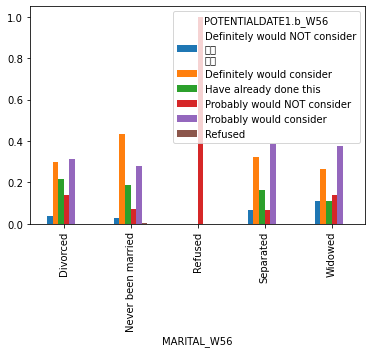

<Figure size 864x864 with 0 Axes>

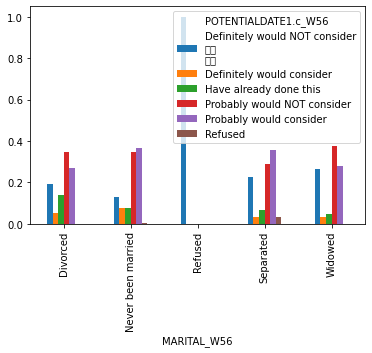

<Figure size 864x864 with 0 Axes>

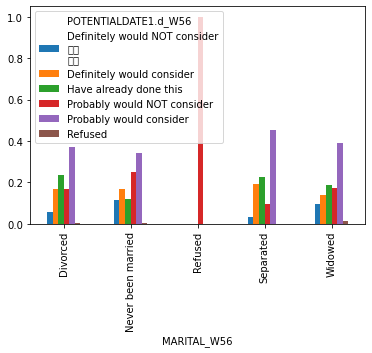

<Figure size 864x864 with 0 Axes>

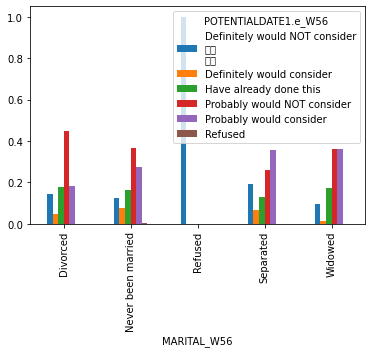

<Figure size 864x864 with 0 Axes>

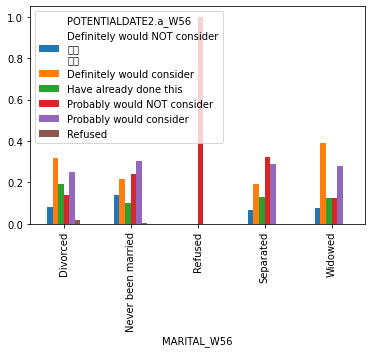

<Figure size 864x864 with 0 Axes>

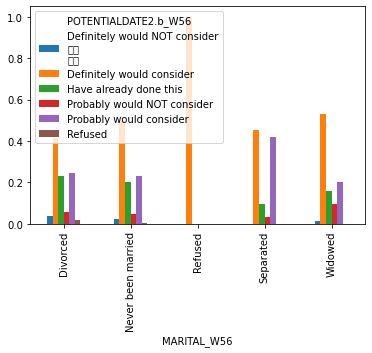

<Figure size 864x864 with 0 Axes>

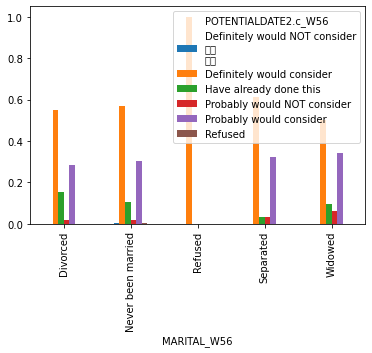

<Figure size 864x864 with 0 Axes>

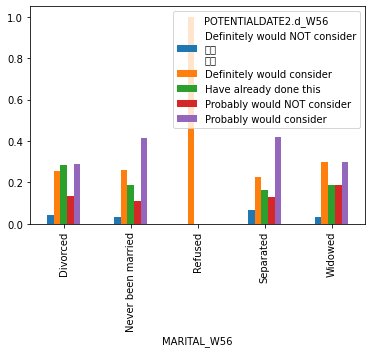

<Figure size 864x864 with 0 Axes>

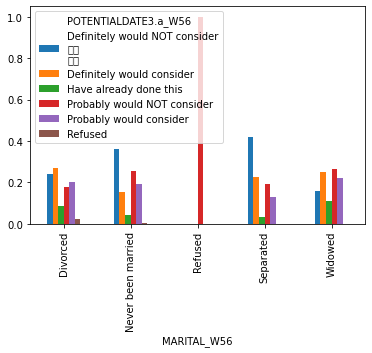

<Figure size 864x864 with 0 Axes>

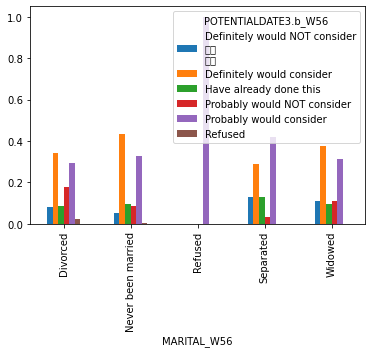

<Figure size 864x864 with 0 Axes>

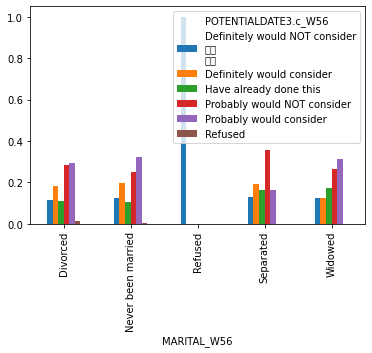

<Figure size 864x864 with 0 Axes>

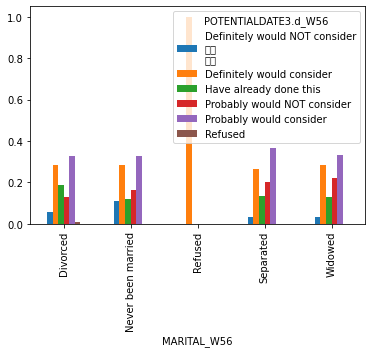

<Figure size 864x864 with 0 Axes>

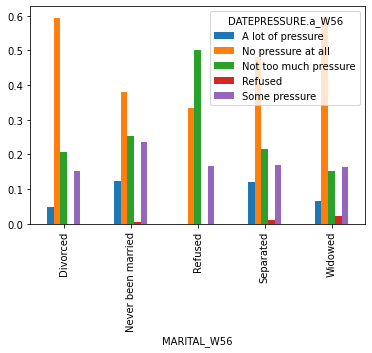

<Figure size 864x864 with 0 Axes>

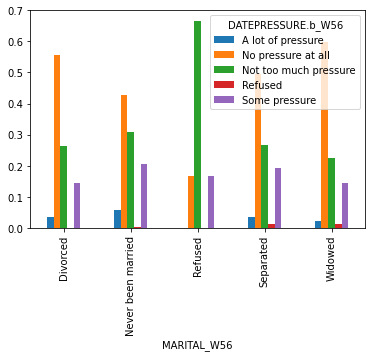

<Figure size 864x864 with 0 Axes>

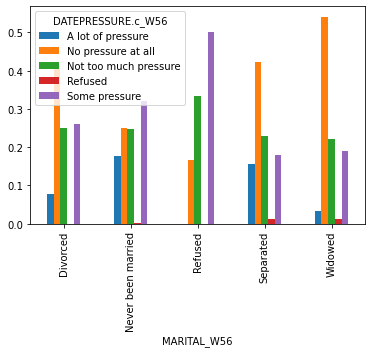

<Figure size 864x864 with 0 Axes>

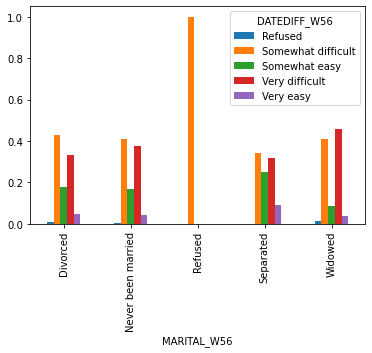

<Figure size 864x864 with 0 Axes>

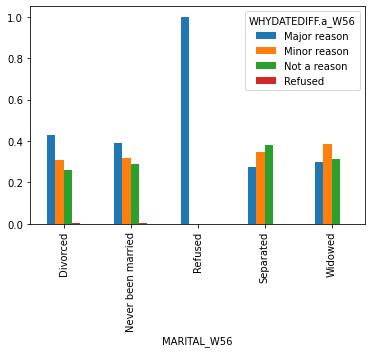

<Figure size 864x864 with 0 Axes>

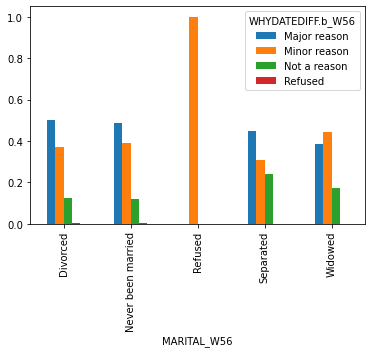

<Figure size 864x864 with 0 Axes>

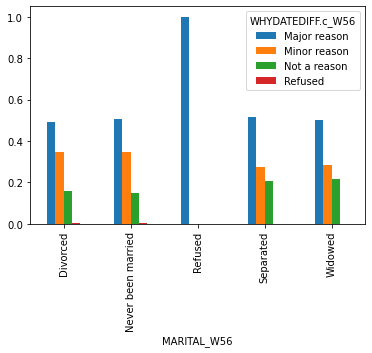

<Figure size 864x864 with 0 Axes>

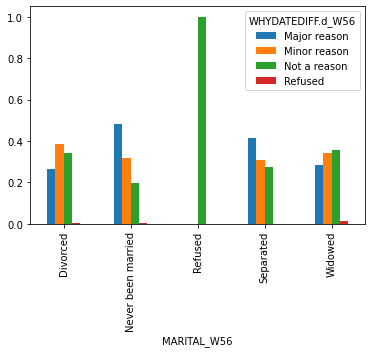

<Figure size 864x864 with 0 Axes>

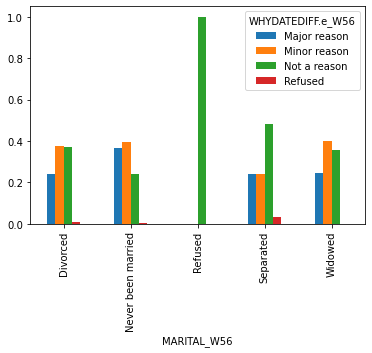

<Figure size 864x864 with 0 Axes>

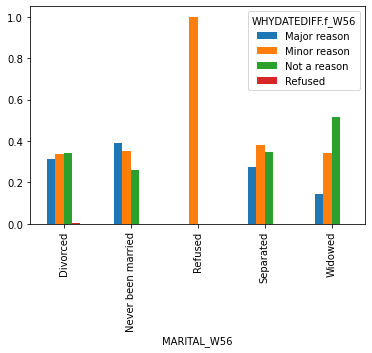

<Figure size 864x864 with 0 Axes>

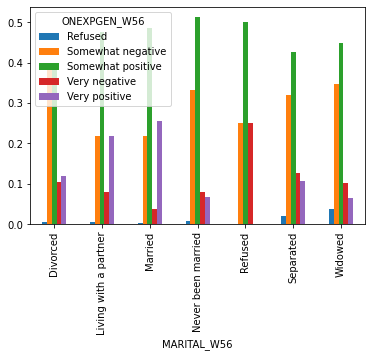

<Figure size 864x864 with 0 Axes>

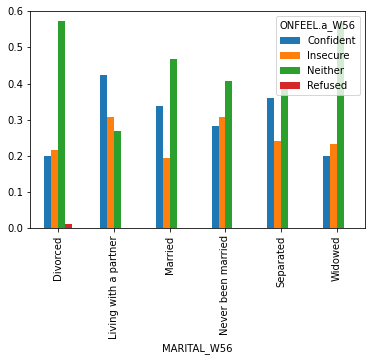

<Figure size 864x864 with 0 Axes>

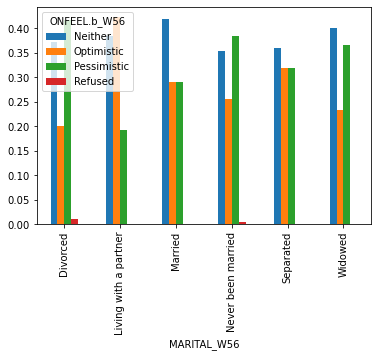

<Figure size 864x864 with 0 Axes>

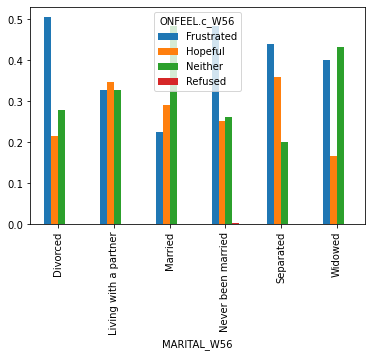

<Figure size 864x864 with 0 Axes>

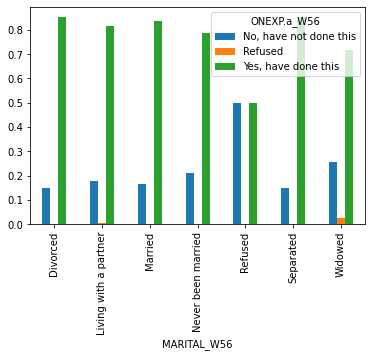

<Figure size 864x864 with 0 Axes>

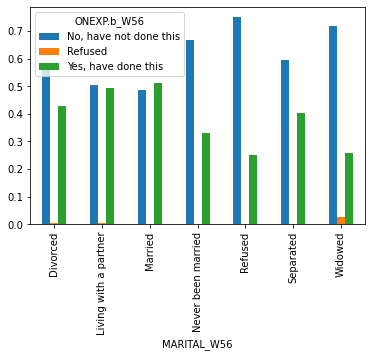

<Figure size 864x864 with 0 Axes>

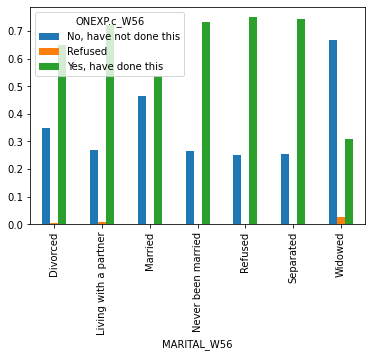

<Figure size 864x864 with 0 Axes>

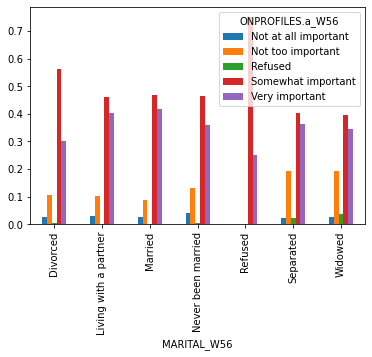

<Figure size 864x864 with 0 Axes>

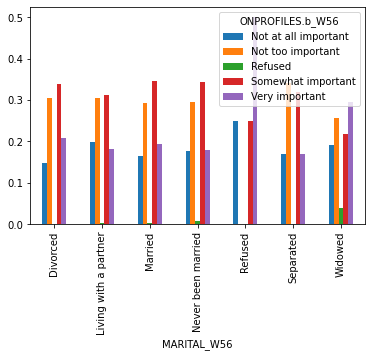

<Figure size 864x864 with 0 Axes>

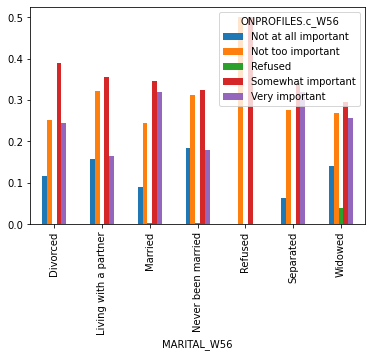

<Figure size 864x864 with 0 Axes>

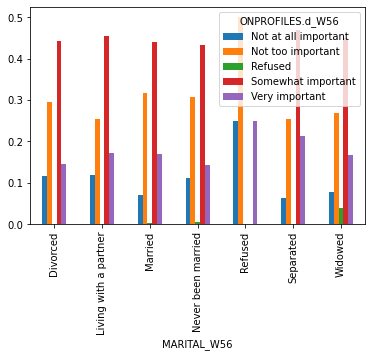

<Figure size 864x864 with 0 Axes>

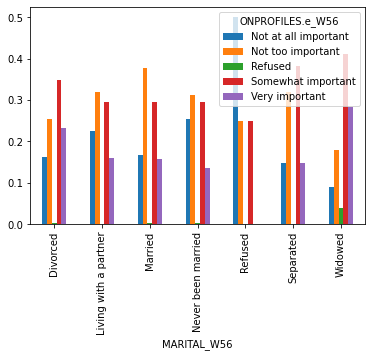

<Figure size 864x864 with 0 Axes>

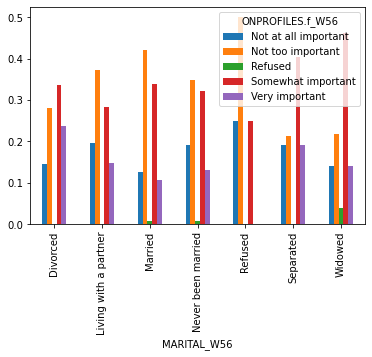

<Figure size 864x864 with 0 Axes>

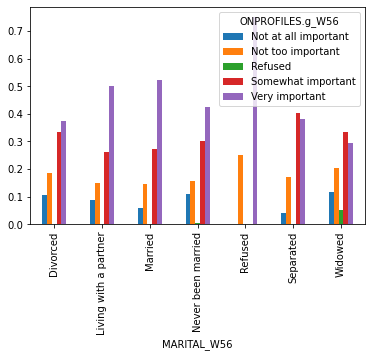

<Figure size 864x864 with 0 Axes>

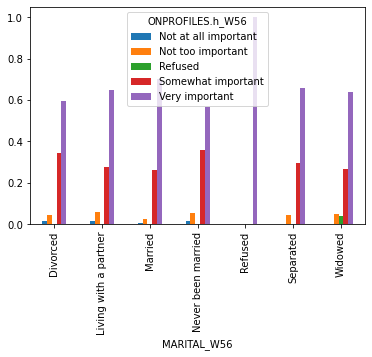

<Figure size 864x864 with 0 Axes>

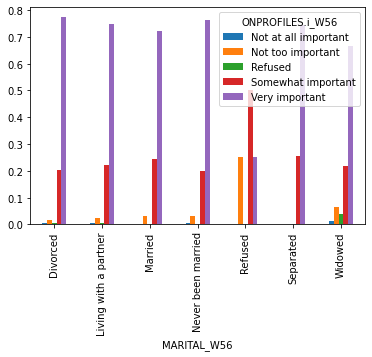

<Figure size 864x864 with 0 Axes>

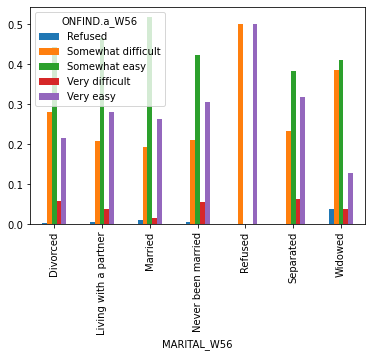

<Figure size 864x864 with 0 Axes>

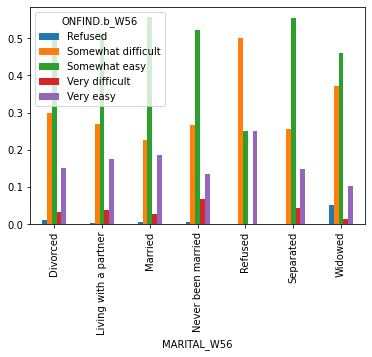

<Figure size 864x864 with 0 Axes>

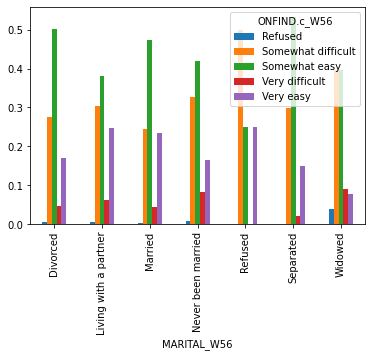

<Figure size 864x864 with 0 Axes>

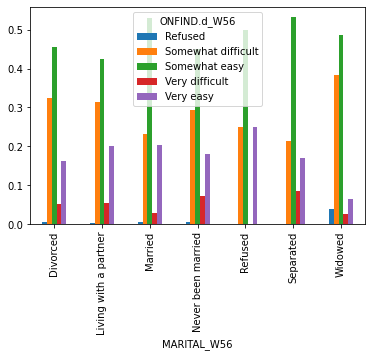

<Figure size 864x864 with 0 Axes>

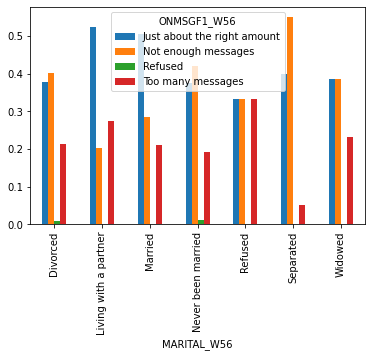

<Figure size 864x864 with 0 Axes>

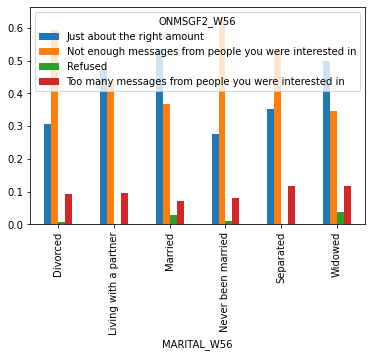

<Figure size 864x864 with 0 Axes>

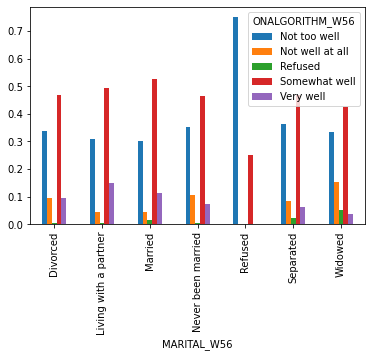

<Figure size 864x864 with 0 Axes>

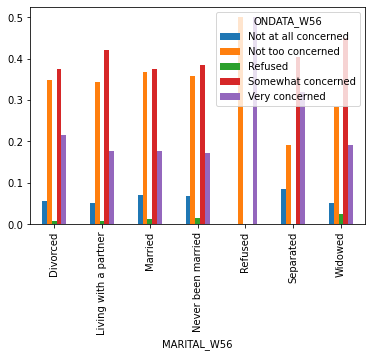

<Figure size 864x864 with 0 Axes>

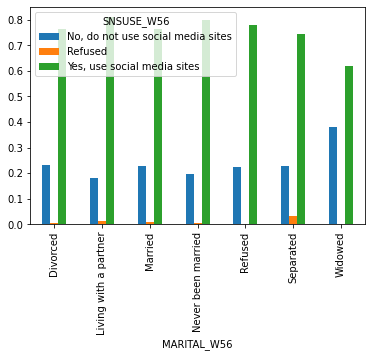

<Figure size 864x864 with 0 Axes>

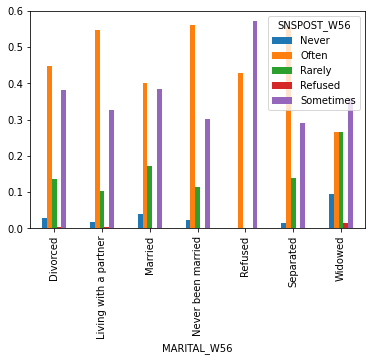

<Figure size 864x864 with 0 Axes>

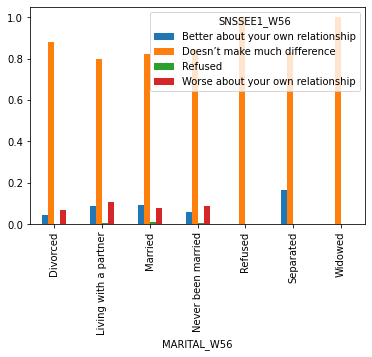

<Figure size 864x864 with 0 Axes>

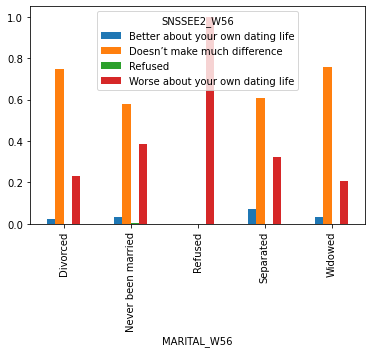

<Figure size 864x864 with 0 Axes>

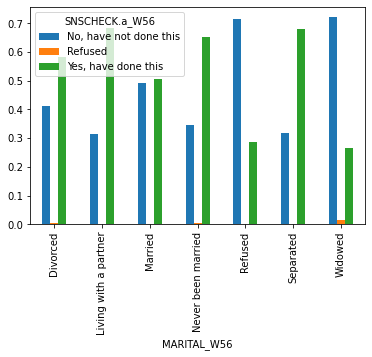

<Figure size 864x864 with 0 Axes>

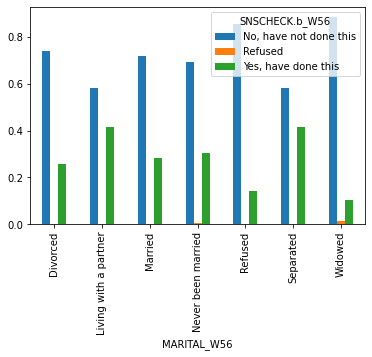

<Figure size 864x864 with 0 Axes>

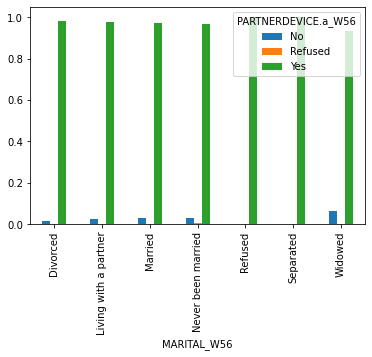

<Figure size 864x864 with 0 Axes>

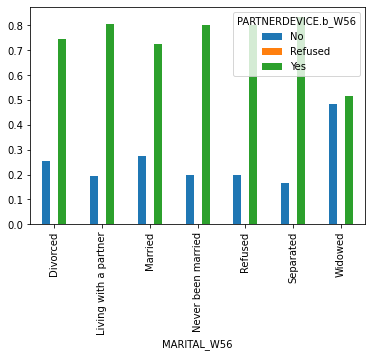

<Figure size 864x864 with 0 Axes>

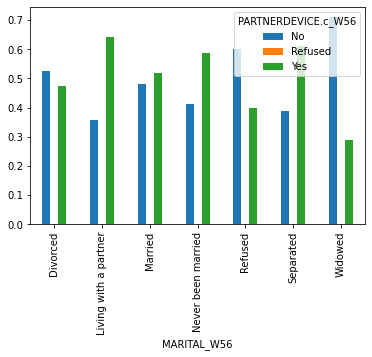

<Figure size 864x864 with 0 Axes>

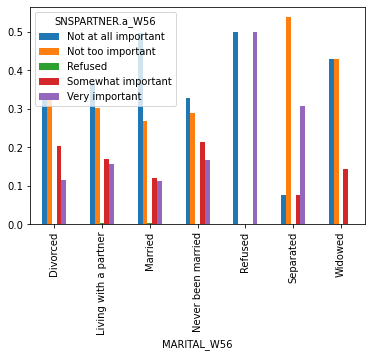

<Figure size 864x864 with 0 Axes>

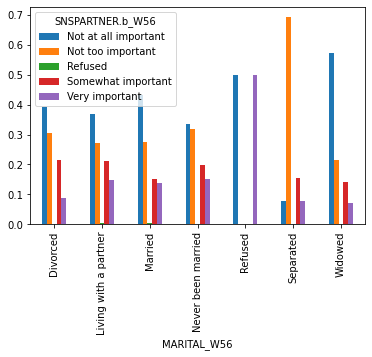

<Figure size 864x864 with 0 Axes>

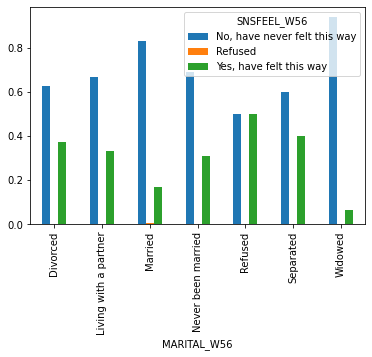

<Figure size 864x864 with 0 Axes>

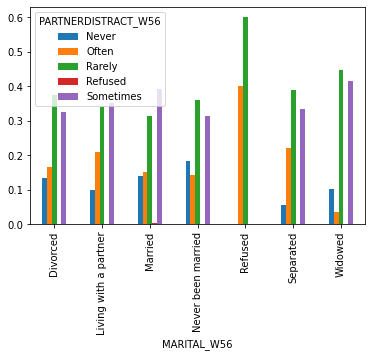

<Figure size 864x864 with 0 Axes>

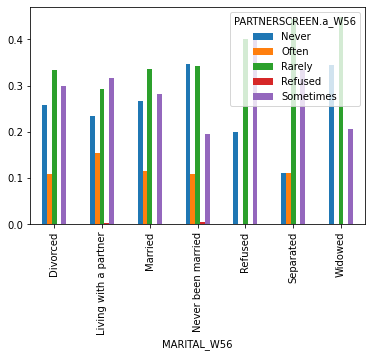

<Figure size 864x864 with 0 Axes>

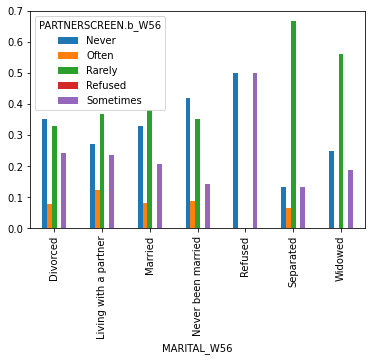

<Figure size 864x864 with 0 Axes>

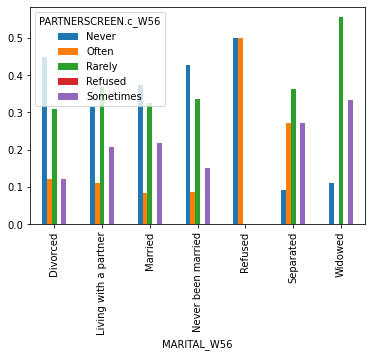

<Figure size 864x864 with 0 Axes>

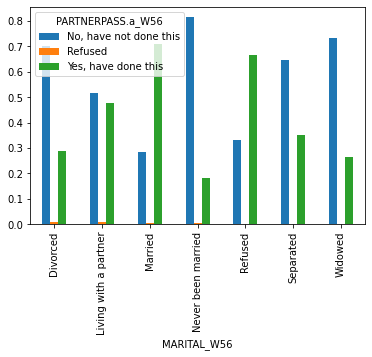

<Figure size 864x864 with 0 Axes>

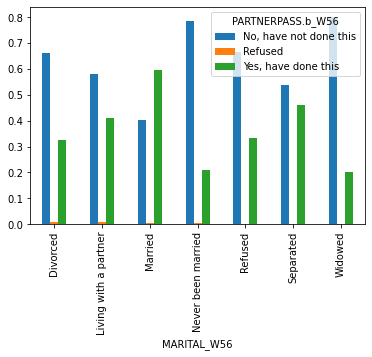

<Figure size 864x864 with 0 Axes>

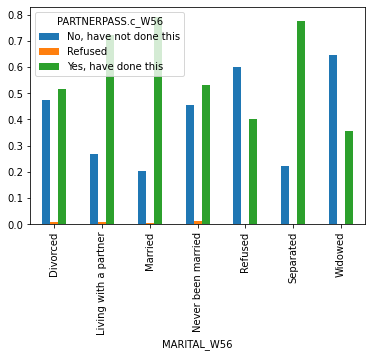

<Figure size 864x864 with 0 Axes>

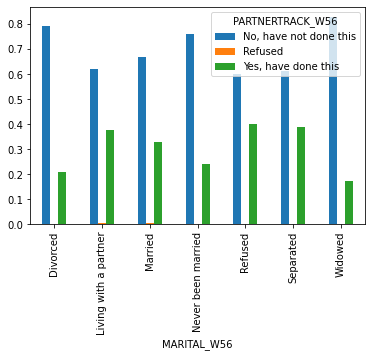

<Figure size 864x864 with 0 Axes>

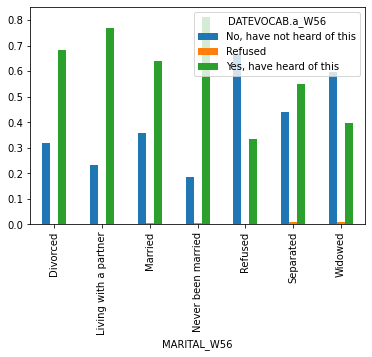

<Figure size 864x864 with 0 Axes>

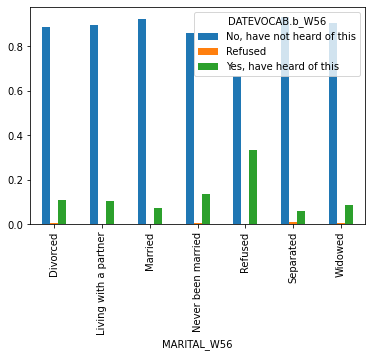

<Figure size 864x864 with 0 Axes>

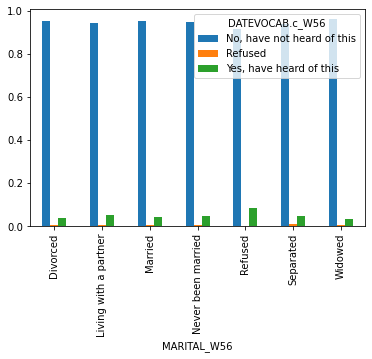

<Figure size 864x864 with 0 Axes>

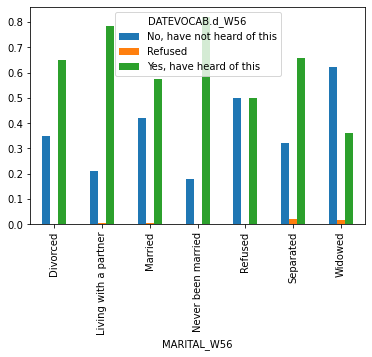

<Figure size 864x864 with 0 Axes>

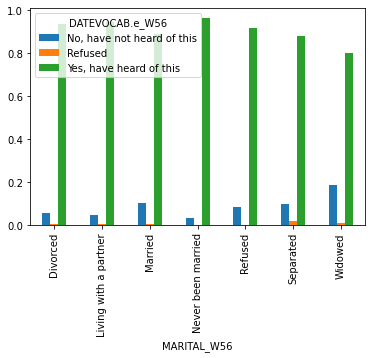

<Figure size 864x864 with 0 Axes>

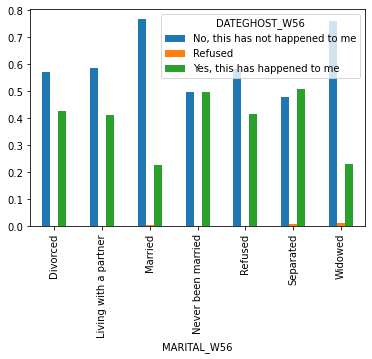

<Figure size 864x864 with 0 Axes>

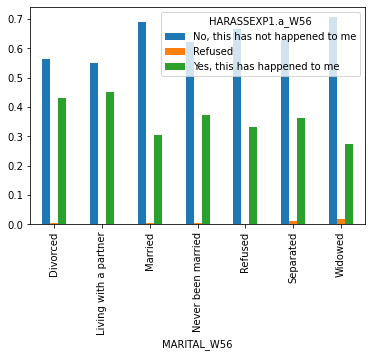

<Figure size 864x864 with 0 Axes>

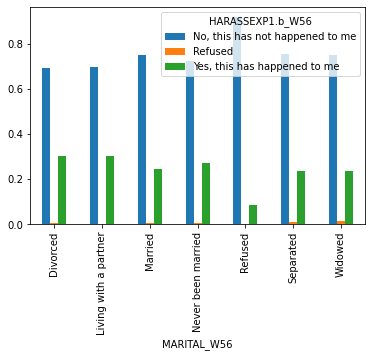

<Figure size 864x864 with 0 Axes>

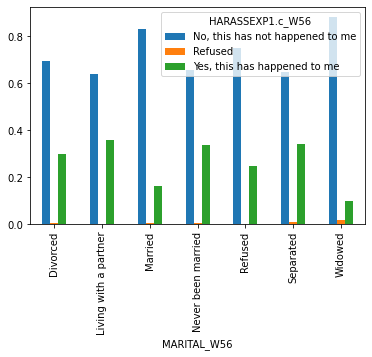

<Figure size 864x864 with 0 Axes>

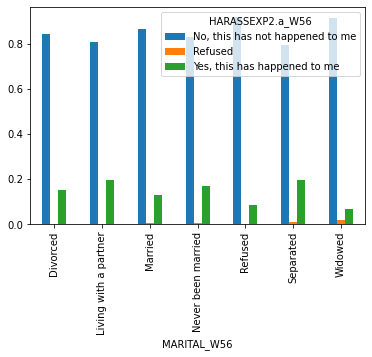

<Figure size 864x864 with 0 Axes>

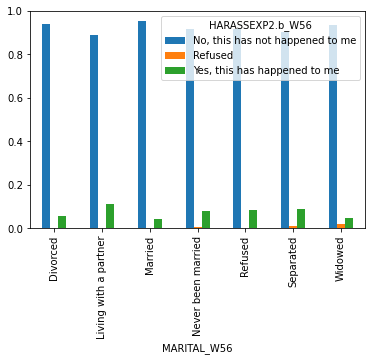

<Figure size 864x864 with 0 Axes>

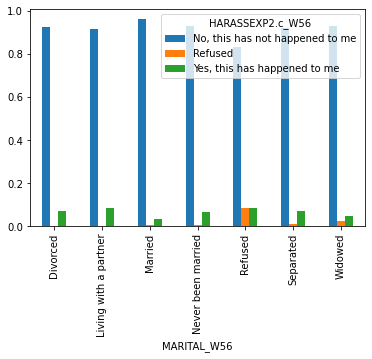

<Figure size 864x864 with 0 Axes>

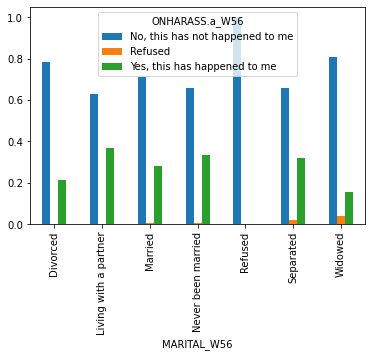

<Figure size 864x864 with 0 Axes>

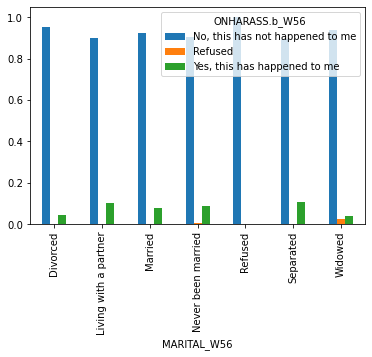

<Figure size 864x864 with 0 Axes>

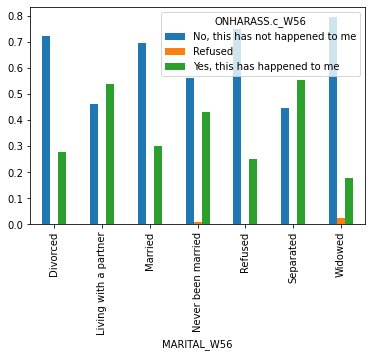

<Figure size 864x864 with 0 Axes>

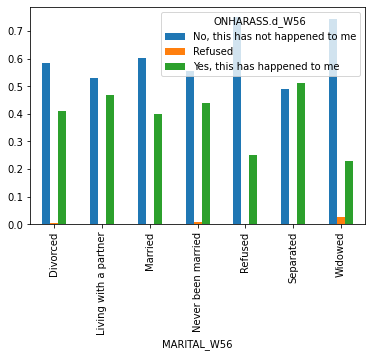

In [12]:
survey = [question for question in df2.columns]

for response in survey:
    plt.figure(figsize = (12, 12))
    pd.crosstab(df2.MARITAL_W56, df2[response], normalize = 'index').plot(kind = 'bar')

 Because there were so few 'Refused to answer' for relationship status we dropped the rows.  

In [13]:
(df2['MARITAL_W56'] == 'Refused').sum() 

12

In [14]:
df2 = df2[df2['MARITAL_W56'] != 'Refused']

Of these graphs, the following were chosen to be of particular interest:

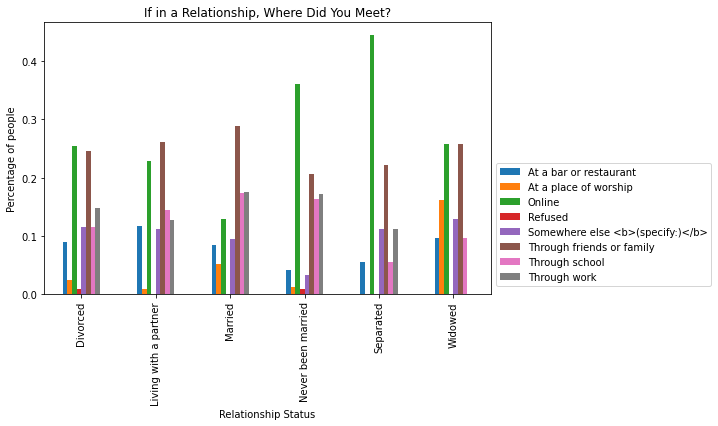

In [15]:
pd.crosstab(df2.MARITAL_W56, df2['PARTNERMEET_W56'], normalize = 'index').plot(kind = 'bar', figsize = (8, 5))
plt.title('If in a Relationship, Where Did You Meet?')
plt.ylabel('Percentage of people')
plt.xlabel('Relationship Status')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.savefig('relationship_status_vs_where_meet.png');

In [16]:
#Question: How did you first meet your spouse or partner?
# Those who are separated or never been married have met a partner through online, wherease married and living with a partner
#met through friends or family.  Divorced was split evenly.

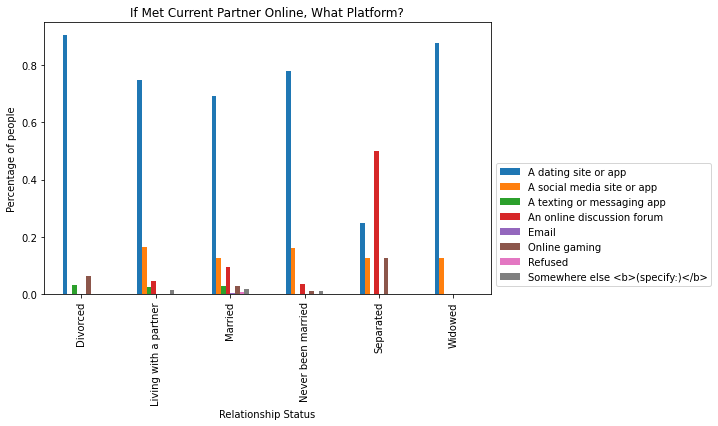

In [17]:
pd.crosstab(df2.MARITAL_W56, df2['ONMEET_W56'], normalize = 'index').plot(kind = 'bar', figsize = (8, 5))
plt.title('If Met Current Partner Online, What Platform?')
plt.ylabel('Percentage of people')
plt.xlabel('Relationship Status')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.savefig('relationship_status_vs_what_platform.png');

In [18]:
#Question: Ask if met current partner online, Where online did you first meet your spouse or partner?
#The majority of people in divorced, living with a partner, married, never been married, and widowed met on a dating site.  
#The separated folks met on an 'online discussion forum'.

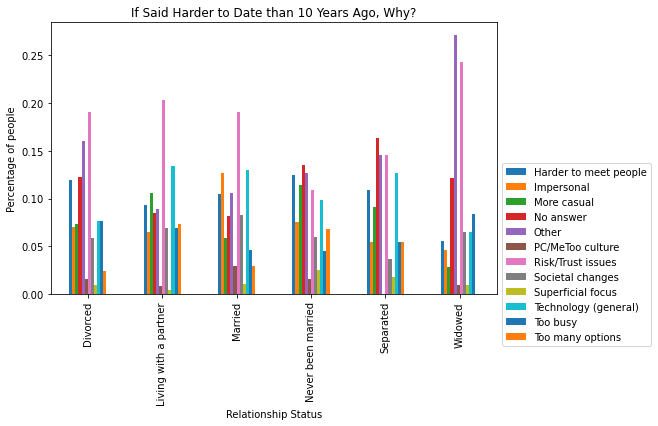

In [19]:
pd.crosstab(df2.MARITAL_W56, df2['WHYDATE10YRHARDOE_M1_W56'], normalize = 'index').plot(kind = 'bar', figsize = (8, 5))
plt.title('If Said Harder to Date than 10 Years Ago, Why?')
plt.ylabel('Percentage of people')
plt.xlabel('Relationship Status')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.savefig('relationship_status_vs_harder_to_date.png');

In [20]:
#Question: If says dating is harder than it was 10 years ago, why? (Open end response)
#Divorced, living with a partner, and married said 'risk, trust issues'.  Widowed had 'other' reason along with 'risk, trust issues',
#Separated and never been married had a multitude of reasons

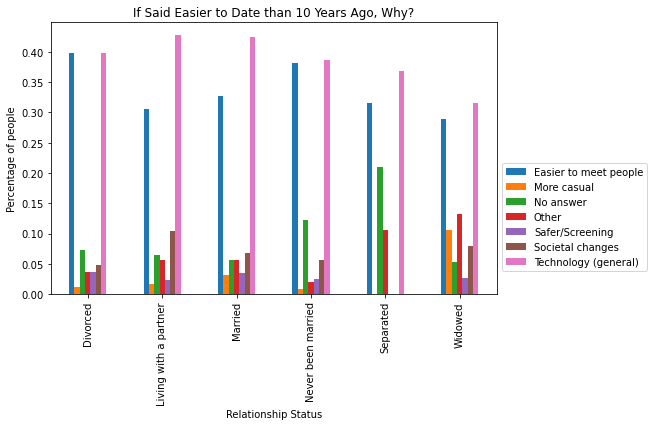

In [21]:
pd.crosstab(df2.MARITAL_W56, df2['WHYDATE10YREASYOE_M1_W56'], normalize = 'index').plot(kind = 'bar', figsize = (8,5))
plt.title('If Said Easier to Date than 10 Years Ago, Why?')
plt.ylabel('Percentage of people')
plt.xlabel('Relationship Status')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.savefig('relationship_status_vs_easier_to_date.png');

In [22]:
#Question: If says dating is easier than it was 10 years ago, why? (Open end response)
# Every group indicated 'technology' made it easier

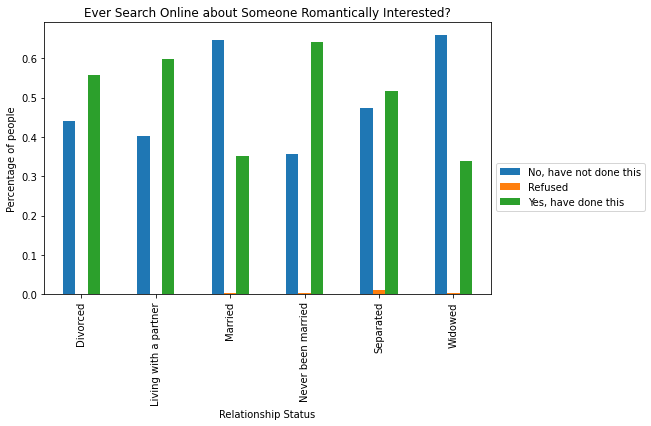

In [23]:
pd.crosstab(df2.MARITAL_W56, df2['ONCHECK_W56'], normalize = 'index').plot(kind = 'bar', figsize = (8,5))
plt.title('Ever Search Online about Someone Romantically Interested?')
plt.ylabel('Percentage of people')
plt.xlabel('Relationship Status')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.savefig('relationship_status_vs_online_check.png');

In [24]:
#Question: Have you ever searched for information about someone you were romantically interested in?

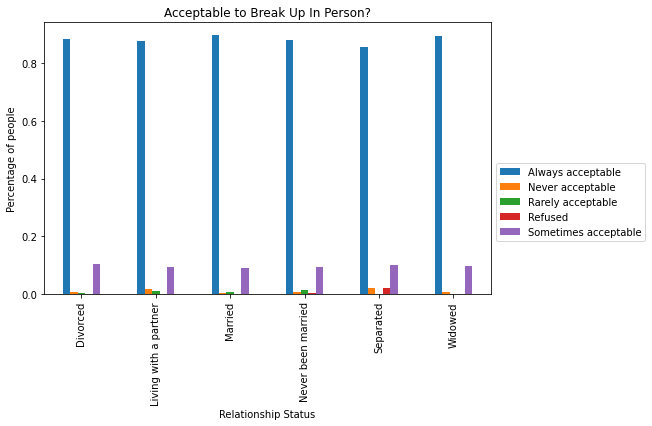

In [25]:
pd.crosstab(df2.MARITAL_W56, df2['BREAKUPACCEPTF2.a_W56'], normalize = 'index').plot(kind = 'bar', figsize = (8,5))
plt.title('Acceptable to Break Up In Person?')
plt.ylabel('Percentage of people')
plt.xlabel('Relationship Status')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.savefig('relationship_status_vs_break_up_in_person.png');

In [26]:
#Question:Whether or not you would personally do this, do you think it’s acceptable for a
#person to break up with someone they are in a committed relationship with in the following ways? In person

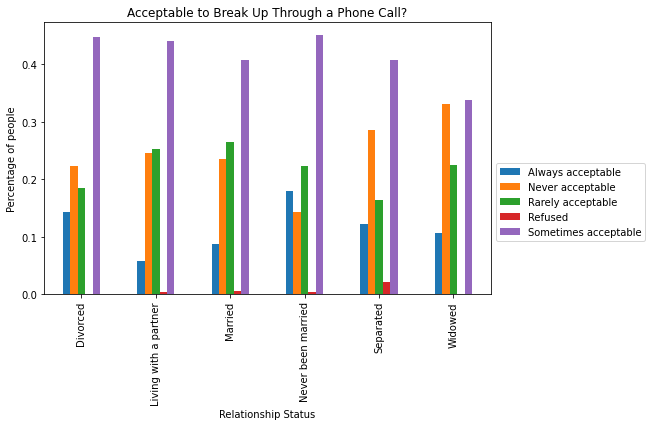

In [27]:
pd.crosstab(df2.MARITAL_W56, df2['BREAKUPACCEPTF2.b_W56'], normalize = 'index').plot(kind = 'bar', figsize = (8,5))
plt.title('Acceptable to Break Up Through a Phone Call?')
plt.ylabel('Percentage of people')
plt.xlabel('Relationship Status')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.savefig('relationship_status_vs_break_up_phone.png');

In [28]:
#Question:Whether or not you would personally do this, do you think it’s acceptable for a
#person to break up with someone they are in a committed relationship with in the following ways? Through a phone call

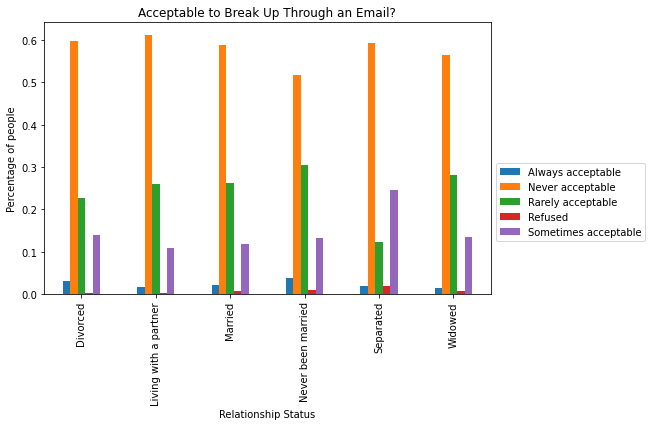

In [29]:
pd.crosstab(df2.MARITAL_W56, df2['BREAKUPACCEPTF2.c_W56'], normalize = 'index').plot(kind = 'bar', figsize = (8,5))
plt.title('Acceptable to Break Up Through an Email?')
plt.ylabel('Percentage of people')
plt.xlabel('Relationship Status')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.savefig('relationship_status_vs_break_up_email.png');

In [30]:
#Question:Whether or not you would personally do this, do you think it’s acceptable for a
#person to break up with someone they are in a committed relationship with in the following ways? Through email

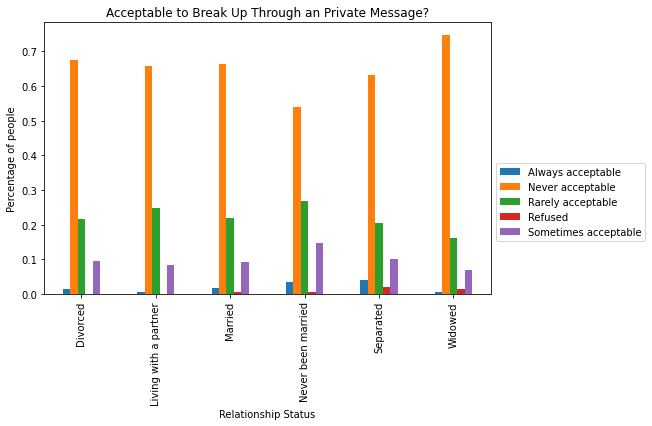

In [31]:
pd.crosstab(df2.MARITAL_W56, df2['BREAKUPACCEPTF2.d_W56'], normalize = 'index').plot(kind = 'bar', figsize = (8,5))
plt.title('Acceptable to Break Up Through an Private Message?')
plt.ylabel('Percentage of people')
plt.xlabel('Relationship Status')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.savefig('relationship_status_vs_break_up_private_message.png');

In [32]:
#Question:Whether or not you would personally do this, do you think it’s acceptable for a
#person to break up with someone they in a committed relationship with in the following ways? 
#Through a private message on social media

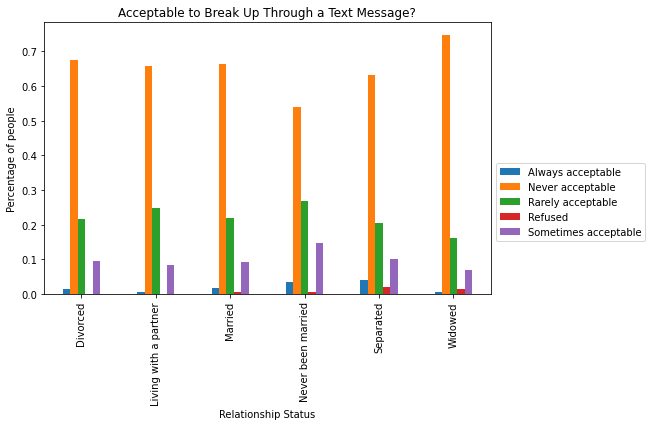

In [33]:
pd.crosstab(df2.MARITAL_W56, df2['BREAKUPACCEPTF2.d_W56'], normalize = 'index').plot(kind = 'bar', figsize = (8,5))
plt.title('Acceptable to Break Up Through a Text Message?')
plt.ylabel('Percentage of people')
plt.xlabel('Relationship Status')
plt.legend(loc='best',bbox_to_anchor=(1, 0.5))
plt.savefig('relationship_status_vs_break_up_text.png');

In [34]:
#Question:Whether or not you would personally do this, do you think it’s acceptable for a
#person to break up with someone they are in a committed relationship with in the following ways? Through a text message